# Data Visualisation
This Notebook focuses on visualisation of data with Python.

We start out with some basic plots by using helper functions with limited options. We then briefly explore the possibilities of interactive plotting before turning to more customisable plotting with the `matplotlib` library. In the last section we will also utilise some of the functionality of `pandas` to process our data.

## 1. Import libraries
First we import some useful libraries. The pandas package is used to handle the data.

In [1]:
import pandas as pd
from basic_tools import counter, filter_frame
from viz_tools import counts_plot

## 2. Load data
We use pandas to load the data into a DataFrame object and store it in the variable `df`.

In [2]:
# Absolute or relative path to CSV-file on your computer.
data_file = '../dataframe_with_texts.csv'

df = pd.read_csv(data_file)

## 3. Basic data visualisation

### 3.1 Working with `counts_plot()`
As seen previously we can use the `counter()` function to create a dictionary of counts of any of the columns of the DataFrame.

#### 3.1.1 Labels
Here we ask `counter()` to return counts of all locations and pass the variable to `counts_plot()` as the first argument. We also give the plot a title using the `title` keyword argument.

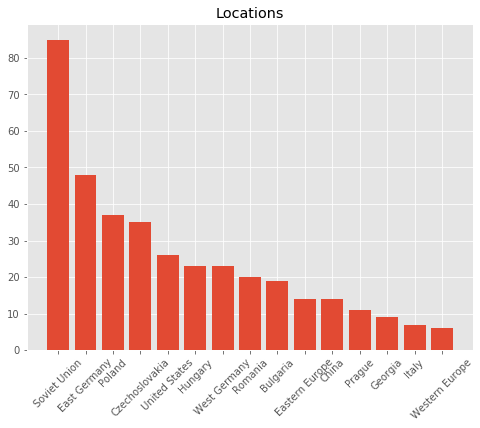

In [3]:
locations = counter(df, 'locations', top=15)

counts_plot(locations, title='Locations')

By default, `counts_plot()` rotates the labels of the X-axis by 45 degrees as this is usually the best compromise between readability and spacing. However, for plots with many, long labels, like above, the readability suffers.

We can change the rotation of the labels by passing the angle as the keyword argument `r`. Note that when we work with integers (datatype `int`), we do not need quotes. If we did use quotes (e.g. `'90'`), Python would treat our number as a string and the functionality would be different.

#### 3.3.2 Adding colour
In order to customise the plot a bit further, we can pass a colour as the keyword argument `c`.

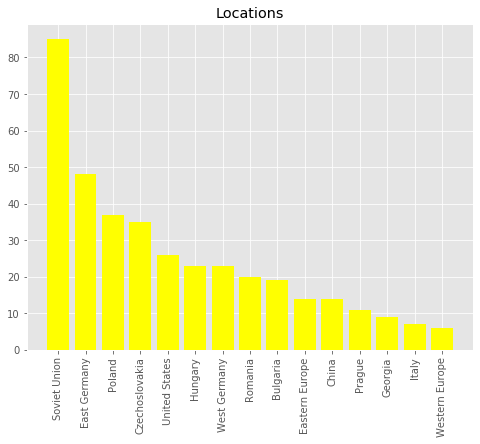

In [4]:
counts_plot(locations, title='Locations', r=90, c='yellow')

Basic colours can passed by using their name. For a comprehensive list of acceptable colour names, see the [matplotlib Documentation](https://matplotlib.org/3.1.0/gallery/color/named_colors.html).


#### 3.3.3 Horizontal plotting
Sometimes a horizontal plot may be more suitable for our data. We can achieve this with the `horizontal` keyword by passing the Boolean value `True`.

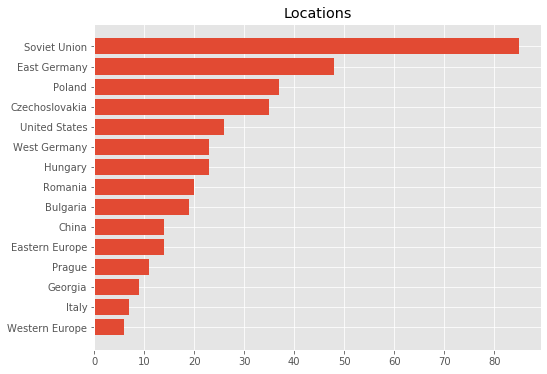

In [11]:
counts_plot(locations, title='Locations', horizontal=True)

**NOTE:** The order of keyword arguments does not matter. On the other hand, as the name implies, positional arguments (arguments without keywords) need to be passed in the correct order for the function to parse them correctly. In the code above, `locations` is a positional argument, while `title`, `r`, `c` and `horizontal` are all keyword arguments.

### 3.2 Interactive plotting
By default, the plots we create in Jupyter are static and we cannot modify them once they are drawn.

To make our plots interactive, we can use the built-in _magic_ command `%matplotlib notebook`.

In [8]:
%matplotlib notebook

If the command above does not return any error messages, plots are now interactive. We can zoom, pan and change the size of the plot. We can also easily save the plot as an image. Try below.

<IPython.core.display.Javascript object>


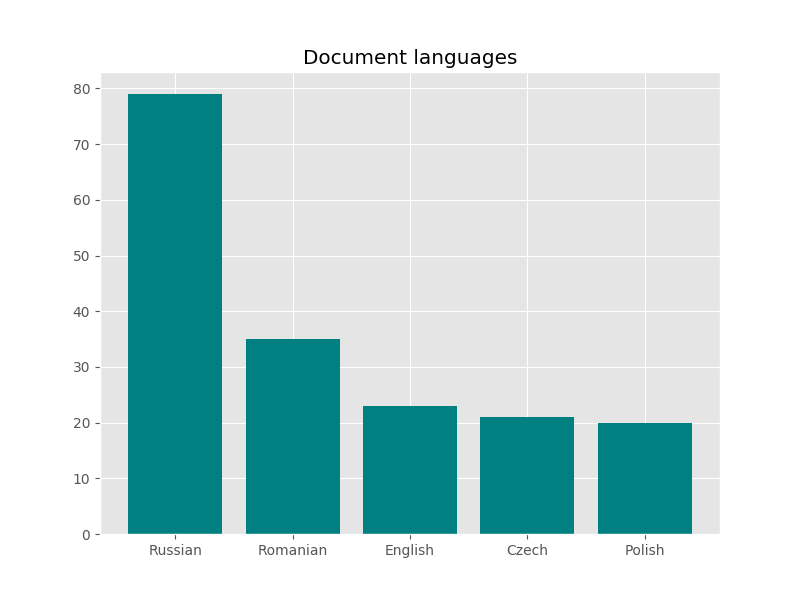

In [9]:
counts_plot(counter(df, 'language', top=5), title='Document languages', r=0, c='teal')

The plot remains active until we lock it by pressing the I/O symbol. Once it is turned off no more changes can be made unless we run the code again.

**NOTE:** When a plot is active and another plot is generated from a different cell, these are plotted to the same space. While this can be useful at times, it can also have unintended consequences. To avoid these, make sure to lock the plot once you are satisfied with it.

To return to static plotting, use `%matplotlib inline` as below.

In [10]:
%matplotlib inline

To learn more about _magic_ commands run `%magic` or visit the [Documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

## 4. Plotting with `matplotlib`
Most visualisations made with Python are created with the `matplotlib` package and it is a very powerful tool. In fact, the `counts_plot()` function is built right on top of `matplotlib` and merely passes information to the right places.

If we want to gain full control of our plots, we should work with `matplotlib` directly. Initially, it is going to be a bit more complicated but the pay-off will be worth the effort.

First we need to import the package before we can use it. `matplotlib` is a very comprehensive package and for now only need the subsection named `pyplot`. By convention, we import it under the name `plt`. The shorter name is convenient as we are going to reference the package a lot.

In [12]:
import matplotlib.pyplot as plt

### 4.1 The simplest plot
The simplest plot we can make with `matplotlib` is a line plot. We use the `plot` method and pass a list of (made-up) numbers to it. We display the plot by calling `plt.show()`.

**NOTE:** When using an interactive shell like Jupyter, we do not strictly need to use `plt.show()` - our plots will be displayed either. However, if we omit `plt.show()` the code cell will return the output of the last function call and that can sometimes clutter our view.

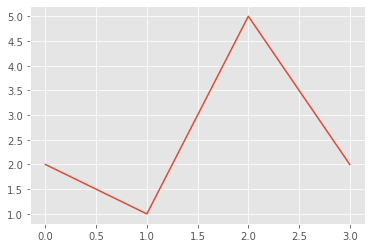

In [13]:
numbers = [2, 1, 5, 2]

plt.plot(numbers)

plt.show()

**NOTE:** In Python, lists are characterised by enclosing square brackets and commas separating the values. Lists can contain any type of data (e.g. strings, integers, other lists) and the datatypes can be mixed within a single list. For plotting purposes we will mostly work with lists of numeric data but lists of strings are also useful for labels, legends and other descriptions.

### 4.2 Plotting with real data
In order to unleash the potential of `matplotlib` on our DataFrame we need to calculate some data we can plot.

For instance, we can calculate the average word lengths of each document in our DataFrame. `pandas` support vector-based calculations, which means we can operate on entire columns (or vectors) at once.

In the cell below, a lot of things are happening in a relatively little amount of code.

- We reference the text column of our DataFrame with square bracket notation: `df['text']`
- We access the `pandas` `str` accessor, which provides a lot of tools for working with textual data (strings).
- One of these tools is the `len()` method, which will return the number of characters in each cell.
- The data are returned as a `pandas` Series object, which is similar to a list but with additional functionality, and this object is stored in the variable `character_counts`.
- Similarly, we use the `str` method `split()` to divide our strings of text into lists of words and store the returned Series in the `words` variable.
- Then we use the `len()` method again to count the number of words and save the output to `word_counts`. When used on lists instead of strings `len()` will return the number of items in the lists instead of the number of characters in the strings.
- Finally, we calculate the average word lengths by simply dividing the character counts with the word counts and store the values in the variable `avg_word_len`.

In [14]:
character_counts = df['text'].str.len()

words = df['text'].str.split()
word_counts = words.str.len()


avg_word_len = character_counts / word_counts

We can now plot our average word length data using `plt.plot()`.

To get a bigger plotting area, we change the size with before plotting the data with `plt.figure(figsize=(width, height))`.

Additionally, we add some information to the plot with the `title()`, `xlabel()` and `ylabel()` methods.

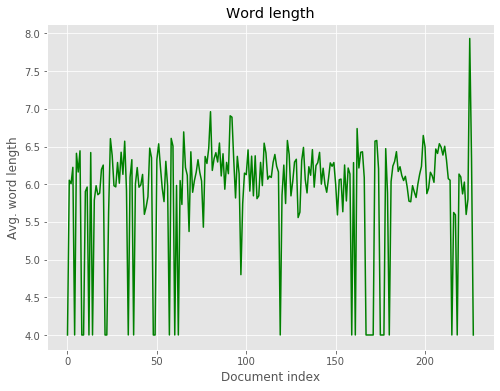

In [38]:
# If we want a differently sized plotting area, we specify the width and the height
# before plotting the data.
plt.figure(figsize=(8, 6))

# The plot method adds the data to the plot. Optionally, we also specify a colour for the plot.
plt.plot(avg_word_len, color='green')

# We use various methods to customise our plot with additional information.
plt.title('Word length')
plt.xlabel('Document index')
plt.ylabel('Avg. word length')

plt.show()

### 4.2 The bar plot

Line plots are great for working with time-series and other continuous data. When plotting categorical data, a bar plot may be more suitable.

Below we calculate average word lengths as before. But instead plotting the average word lengths of all documents we use the `filter_frame()` function to create two new DataFrames based on documents types. We then calculate the average word lengths across those DataFrames and plot them against each other.

In [16]:
# Create a new DataFrame with documents of type 'cable'.
cable = filter_frame(df, 'cable', col='type')

# Count the number of characters for each cell in the 'text' column.
cable_character_counts = cable['text'].str.len()

# Split the cells of the cells of the 'text' column before counting the number of words.
cable_words = cable['text'].str.split()
cable_word_counts = cable_words.str.len()

# Calculate the average characters per word for each document in the new DataFrame.
cable_word_len = cable_character_counts / cable_word_counts

# Reduce the calculated word lengths to a single average value for the entire DataFrame
cable_avg_word_len = cable_word_len.mean()

# Repeat the process with documents of type 'report'.
report = filter_frame(df, 'report', col='type')

report_character_counts = report['text'].str.len()

report_words = report['text'].str.split()
report_word_counts = report_words.str.len()

report_word_len = report_character_counts / report_word_counts

report_avg_word_len = report_word_len.mean()

We use the `bar()` method to add the values one at the time with our label as the X-value and the average word length as the Y-value.

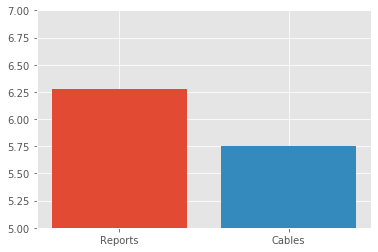

In [17]:
plt.bar('Reports', report_avg_word_len)
plt.bar('Cables', cable_avg_word_len)

# We limit the range of the Y-axis to enhance the differences in the plotted values.
plt.ylim(5, 7)

plt.show()

Notice that because we added the values separately, they are treated as two different plots and are given two different colours.

To treat them as a single plot, we can collect the X-values and Y-values into lists before adding them to the plot as shown below.

Alternatively, we can specify the colour of the plot with the `color` keyword parameter.

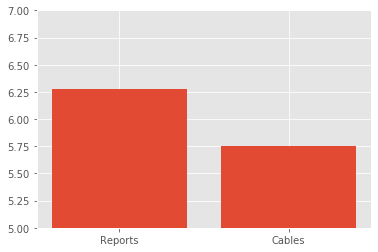

In [18]:
x_values = ['Reports', 'Cables']
y_values = [report_avg_word_len, cable_avg_word_len]

plt.bar(x_values, y_values)

plt.ylim(5, 7)

plt.show()

You might have noticed that in the previous example, we repeated a lot of similar code.

In order to apply the same calculations to a number of different values, we can utilise a `for` loop.

Below we attempt to illustrate differences in average word lengths between languages. First we identify the different languages and store them as a list. We also create an empty list which we can append our average word length values to as we calculate them.

We use the `for` loop to iterate over the values in the list of languages. For each value we:
- Create a DataFrame with only documents of that specific language.
- Calculate the average word length.
- Append the value to the `language_word_lengths` list.

In [25]:
# Get list of unique languages from DataFrame.
languages = df['language'].unique()

# Create empty list, which can later store our avg. word lengths.
language_word_lengths = list()

# Use a for loop to get the counts for each language in the list of unique languages.
for language in languages:
    # Create new temporary DataFrame for the specific langauge.
    language_frame = filter_frame(df, language, col='language')
    
    # Count the characters.
    language_character_counts = language_frame['text'].str.len()
    
    # Count the words.
    language_words = language_frame['text'].str.split()
    language_word_counts = language_words.str.len()
    
    # Calculate avg. word length for the individual documents.
    language_word_len = language_character_counts / language_word_counts
    
    # Get the overall average value of all the document avg. word lengths.
    language_avg_word_len = language_word_len.mean()
    
    # Finally, we append the overall avg. word length for this language to the list of word lengths.
    language_word_lengths.append(language_avg_word_len)

Now we have all the languages stored in the list `languages` and the corresponding avg. word lengths stored in the list `language_word_lengths`.

We visualise the data in a bar plot by passing the languages as the X-axis and the word lengths as the Y-axis.

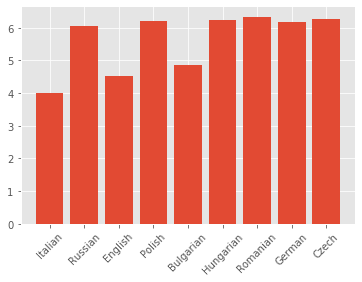

In [28]:
plt.bar(languages, language_word_lengths)

# To rotate the tick labels on the X-axis we explicitly add the labels and define the rotation.
plt.xticks(languages, rotation=45)

plt.show()

Using a `for` loop can save us lot of code - especially as our datasets get bigger. The plot above requires the same amount of code whether we have 5 values or 500 values.

As a final example, the code below performs the same calculations. But instead of using a `for` loop, we use the built-in functionality of `pandas`.

In [29]:
# Calculate character counts and word counts and add them as columns to the DataFrame
df['word_count'] = df['text'].str.split().str.len()
df['char_count'] = df['text'].str.len()

# Add a column with avg. word lengths
df['avg_word_len'] = df['char_count'] / df['word_count']

# Use the groupby method to group the rows of our DataFrame by language
alt_languages = df.groupby('language')

# Calculate the overall avg. word lengths of the grouped data.
alt_word_lengths = alt_languages['avg_word_len'].mean()

The main difference is the `groupby()` method. By gathering all of our calculations in the same DataFrame we can perform a number of tasks across groups of data. This is a very powerful tool but the code can also quickly get more complex and convoluted.

For the data we are going to work with either method will get the job done.

Finally, to check that we get the same results, we plot the data. The language names for the X-axis can be accessed with the `index` method, while we pass the `alt_word_lengths` variable as the Y-values.

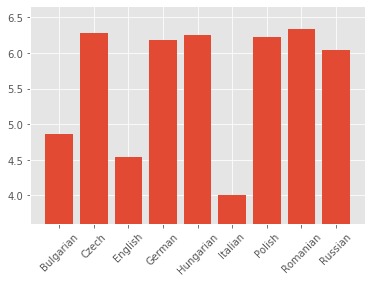

In [37]:
plt.bar(alt_word_lengths.index, alt_word_lengths)

plt.xticks(alt_word_lengths.index, rotation=45)

# We limit the Y-axis to start at 90 % of the smallest value in word_lengths
# in order to focus on the differences in the data.
min_y_value = min(alt_word_lengths) * .90
plt.ylim(min_y_value)

plt.show()

Notice that instead of hard-coding the Y-axis starting point, we used the built-in function `min()` to find the smallest value in the data and defined the `min_y_value` variable as 90 % of that value. That way we can limit the Y-axis without necessarily knowing the span of our values prior to plotting.

## 5. Conclusion

This concludes the Data Visualisation Notebook. We have covered a lot of ground and as you have seen, the code can quickly become more complex - especially when working directly with libraries such as `pandas` and `matplotlib` because the possibilities are virtually endless.

For now we have just scratched the surface and hopefully you feel comfortable attempting to transfer these methods to other data sets and types of analyses.

Notice that some of these analyses are simplified for the sake of the example. For instance, when calculating average word lengths you would probably want to apply some data cleaning beforehand in order to account for punctuation and other types of noise in the texts. Also, our comparison of word lengths across languages makes little sense when all of our text data are translated into English.